Importing the necessary files

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Reading the file

In [2]:
data = pd.read_excel('/Users/deepali/Desktop/IMDB_Movies.xlsx')
data.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(5043, 28)

In [5]:
type(data.num_user_for_reviews)

pandas.core.series.Series

In [6]:
type(data.imdb_score)

pandas.core.series.Series

<b>To describe the genres of the movies i create a word cloud that describes about the films. In word cloud the size of the word is directly proportional to the frequency of occurence in a text.</b>

Importing the necessary files for the wordcloud

In [7]:
from wordcloud import WordCloud,STOPWORDS 
# stopwords are the most common words in a language.
# Example: the, is, at, which, and on

In [8]:
stopwords = set(STOPWORDS) 

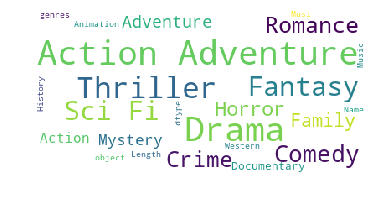

In [9]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40
                         ).generate(str(data['genres'])) # generate function generates word cloud from text.
print(wordcloud)
figure = plt.figure(1)  # used to specify the figure number.
plt.imshow(wordcloud) # optimizes figure, axes, and image object properties for image display
plt.axis('off') # Removes the axis labelsplt.show()
plt.show()
figure.savefig('/Users/deepali/Desktop/wordcloud.png',dpi = 900)  # dots per inch

<b>Inference : From the word cloud i come to the conclusion that the genre of the movie is on a higher frequency for :
       Action,Adventure,Drama & Thriller etc and on a lower frequency for History,Animation etc </b>

In [10]:
len(data['movie_title'].unique())

4917

In [11]:
m_title = data.movie_title

In [12]:
data["is_duplicate"]= m_title.duplicated()


In [13]:
data.loc[data['is_duplicate'] == True].head(2)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,is_duplicate
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander SkarsgÃ¥rd,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000,True
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000,True


In [14]:
top_10_movies_imdb_score = data.groupby('movie_title')['imdb_score'].mean().sort_values(ascending=False).head(10)

<b>Inference</b><br>
<b>Top 10 movies based on the imdb_score are as follows:  </b>
    <li>Towering InfernoÂ </li>
    <li>The Shawshank Redemption</li>
    <li>The Godfather </li>
    <li>Kickboxer: Vengeance </li>
    <li>DekalogÂ</li>
    <li>The Dark Knight</li>
    <li>FargoÂ</li>
    <li>The Godfather: Part II</li>
    <li>The Good, the Bad and the Ugly</li>
    <li>Pulp Fiction</li>

In [15]:
top_10_movies_imdb_score

movie_title
Towering InfernoÂ                 9.5
The Shawshank Redemption          9.3
The Godfather                     9.2
Kickboxer: Vengeance              9.1
DekalogÂ                          9.1
The Dark Knight                   9.0
FargoÂ                            9.0
The Godfather: Part II            9.0
The Good, the Bad and the Ugly    8.9
Pulp Fiction                      8.9
Name: imdb_score, dtype: float64

In [16]:
type(top_10_movies_imdb_score)

pandas.core.series.Series

<B>Below is the bar plot of top_10_movies based on the imdb_score</B>

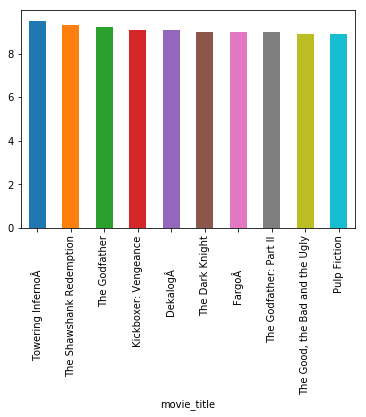

In [17]:
top_10_movies_imdb_score.plot.bar()

In [18]:
movies_with_long_duration  = data.groupby('movie_title')['duration'].mean().sort_values(ascending=False).head(10)

<B>Below is the bar plot of the moves with long duration</B>

In [19]:
top_10_movies_imdb_score

movie_title
Towering InfernoÂ                 9.5
The Shawshank Redemption          9.3
The Godfather                     9.2
Kickboxer: Vengeance              9.1
DekalogÂ                          9.1
The Dark Knight                   9.0
FargoÂ                            9.0
The Godfather: Part II            9.0
The Good, the Bad and the Ugly    8.9
Pulp Fiction                      8.9
Name: imdb_score, dtype: float64

<B>Below is the bar plot of the moves with long duration</B>

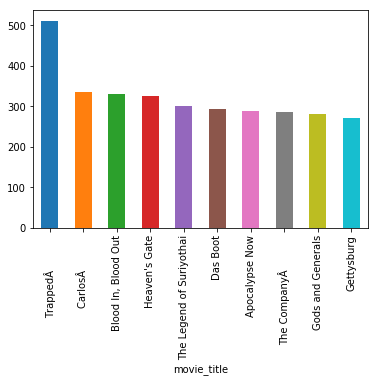

In [20]:
movies_with_long_duration.plot.bar()

Calculating the movies which have a high budget

In [21]:
top_10_budget  = data.groupby('movie_title')['budget'].mean().sort_values(ascending=False).head(10)

In [22]:
top_10_budget

movie_title
The Host                  6.127750e+09
Lady Vengeance            4.200000e+09
Fateless                  2.500000e+09
Princess Mononoke         2.400000e+09
Steamboy                  2.127520e+09
Akira                     1.100000e+09
Godzilla 2000             1.000000e+09
Tango                     7.000000e+08
Kabhi Alvida Naa Kehna    7.000000e+08
Kites                     6.000000e+08
Name: budget, dtype: float64

<b>Below is the plot of the movies which have a high budget</b>

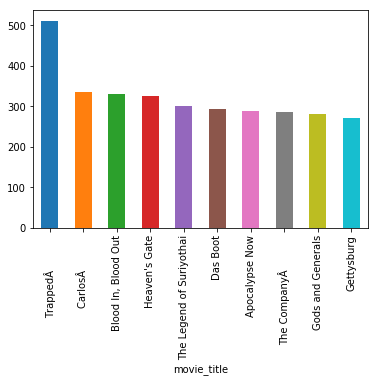

In [23]:
movies_with_long_duration.plot.bar()

<b>Below tables shows the average rating for thr various genres</b>

In [24]:
ratings2 = data.groupby(['movie_title','genres'], as_index=False)['imdb_score'].aggregate(np.mean)
ratings2.head()

,movie_title,genres,imdb_score
0,#Horror,Drama|Horror|Mystery|Thriller,3.3
1,10 Cloverfield Lane,Drama|Horror|Mystery|Sci-Fi|Thriller,7.3
2,10 Days in a Madhouse,Drama,7.5
3,10 Things I Hate About You,Comedy|Drama|Romance,7.2
4,"10,000 B.C.Â",Comedy,7.2


In [25]:
type(ratings2)

pandas.core.frame.DataFrame

<b>Conclusions : </b>
    I would like to check which are the genres which are famous :<br> For this i created a word cloud for the same</li>
    Following was my findings : <br>
    From the word cloud i come to the conclusion that the genre of the movie is on a higher frequency for  Action,Adventure,Drama & Thriller etc and on a lower frequency for History,Animation etc
    


<li>The other analysis i did was check for the movies which had a high imdb_score</li>
<li>I also calculated the the movies which have a high budget & moveis which are of high duration </li>
<li>Adding to my analysis i also checked for the movies which had a high budget </li>
<li>Also analysed the average movie rating for each o the genre.</li>

<b>We now filter the movies based on different genre</b>

Filterig the drama movies

In [26]:
drama_movies=data['genres'].str.contains('Drama')
data[drama_movies].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,is_duplicate
22,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,105219735.0,Action|Adventure|Drama|History,...,English,USA,PG-13,200000000.0,2010.0,882.0,6.7,2.35,17000,False
25,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,...,English,New Zealand,PG-13,207000000.0,2005.0,919.0,7.2,2.35,0,False
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000,False
50,Color,Baz Luhrmann,490.0,143.0,1000.0,77.0,Elizabeth Debicki,29000.0,144812796.0,Drama|Romance,...,English,Australia,PG-13,105000000.0,2013.0,509.0,7.3,2.35,115000,False
61,Color,Robert Zemeckis,240.0,96.0,0.0,10000.0,Colin Firth,18000.0,137850096.0,Animation|Drama|Family|Fantasy,...,English,USA,PG,200000000.0,2009.0,14000.0,6.8,2.35,0,False


Filtering the thriller movies

In [27]:
thriller_movies = data['genres'].str.contains('Thriller')
data[thriller_movies].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,is_duplicate
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,False
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,False
28,Color,Peter Berg,377.0,131.0,532.0,627.0,Alexander SkarsgÃ¥rd,14000.0,65173160.0,Action|Adventure|Sci-Fi|Thriller,...,English,USA,PG-13,209000000.0,2012.0,10000.0,5.9,2.35,44000,False
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000,False
30,Color,Sam Mendes,750.0,143.0,0.0,393.0,Helen McCrory,883.0,304360277.0,Action|Adventure|Thriller,...,English,UK,PG-13,200000000.0,2012.0,563.0,7.8,2.35,80000,False


Filterig the adventure movies

In [28]:
adventure_movies = data['genres'].str.contains('Adventure')
data[adventure_movies].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,is_duplicate
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,False
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,False
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,False
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,False
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,False


We now try to find the correlation between the variables

In [29]:
corr = data.corr()

In [30]:
corr

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,is_duplicate
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176,0.113463
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605,0.027507
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048,-0.009662
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844,0.051682
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348,0.027713
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082,0.074796
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924,0.046509
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786,0.041545
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918,-0.018177
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594,0.084437


The cast_total_facebook_likes and actor_1_facebook_likes are highly correlated so we drop the cast_total_facebook_likes.

In [31]:
data=data.drop('cast_total_facebook_likes',axis = 1)
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,is_duplicate
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,False
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,False
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,False
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,False
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,False
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,False
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,False
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,False
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,False
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000,False


We now predict the imdb score by making use of Regression

In [32]:
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
X_train = train_df.drop("imdb_score", axis=1)
Y_train = train_df["imdb_score"]
X_test  = test_df.drop("imdb_score", axis=1)
Y_test = test_df["imdb_score"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

NameError: name 'train_df' is not defined

In [ ]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.movie_facebook_likes, data.imdb_score, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train))
acc_knn

In [ ]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train)
results=model.fit()
print (results.summary())

In [ ]:
#Linear model was cross validated for different combination of variables and the least significant variables were dropped
#Model with the least AIC and highest R-squared is selected



In [ ]:

#Calculating difference between Predicted and Actual Ratings

pred=results.predict(X_test)
h=pd.DataFrame(pred)
h=h.round(1) 
g = pd.DataFrame(y_test)
g = g.reset_index(drop=True)
h['rating']=g
h.columns=['pred','actual']
h['difference']=round(abs(h.pred-h.actual),2)
h[:1]

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

We now check if movie rating is affected by number of critic for reviews

In [ ]:
plt.scatter(data.imdb_score,data.num_critic_for_reviews,alpha=0.5)
plt.title("IMDB Score Vs Number of Critics for reviews")
plt.xlabel("IMDB Score")
plt.ylabel("Number of Critics for reviews")

In [ ]:
# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [ ]:
data.genres.str.get_dummies().sum().plot.pie(label='Genre', autopct='%1.0f%%')


https://stackoverflow.com/questions/52132970/pandas-how-to-plot-the-pie-diagram-for-the-movie-counts-versus-genre-of-imdb-mo

all models https://github.com/jmhummel/IMDb-predictive-analytics/blob/master/src/notebook.ipynb

In [ ]:
names = data.columns.values

In [ ]:
names

Let us make clusters based on the imdb rating and the number of people who have reviewed the movie

In [ ]:
from sklearn.cluster import KMeans

We create a numpy array of data points because the Scikit-Learn library can work with numpy array type data inputs without requiring any preprocessing.

In [ ]:
imdb_score_data = np.asarray(data['imdb_score'])
imdb_score_data

In [ ]:
imdb_score_data

In [ ]:
type(imdb_score_data)

In [ ]:
data.head(2)

In [ ]:
data = data.dropna

In [ ]:
num_critic_for_reviews_data = np.asarray(data['num_critic_for_reviews'])
num_critic_for_reviews_data

In [ ]:
type(num_critic_for_reviews_data)

imdb_score_data_points = (imdb_score_data).T

In [ ]:
imdb_score_data_points 

In [ ]:
imdb_score_data_points = (imdb_score_data).T

In [ ]:
# imdb_score_data.reshape(1, -1)

In [ ]:
X = np.array(imdb_score_data)
Y = np.array(num_critic_for_reviews_data)

In [ ]:
np.array((X,Y))

data = np.array((X,Y)).T
data

In [ ]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(data)

In [ ]:
print(kmeans.cluster_centers_) 

In [ ]:
plt.scatter(data[:,0],data[:,1], c=kmeans.labels_, cmap='rainbow') 
plt.show()